#  Cardio Disease Classification Problem

1. [Introduction and Background](#t1.)
2. [Objective](#t2.)
3. [Data Understanding](#t3.)
4. [Exploratory Data Analysis (EDA)](#t4.)
5. [Separating Training and Testing Data](#t5.)
6. [Classification Modeling](#t6.)
7. [Deployment](#t7.)
8. [Sources](#t8.)


This **cardio disease** modeling is made by Group 3  using a dataset from [kaggle Cardio Disease
](https://www.kaggle.com/raminhashimzade/cardio-disease). The Dataset was published by [Ramin Hashimzade](https://www.kaggle.com/raminhashimzade) on 2020-01-19 as a first version.


Authors of this notebook (group three members):

1. [Kyoungmin Baik](https://learn.continue.yorku.ca/user/view.php?id=39415&course=5085)
2. [Stephanie Ibach](https://learn.continue.yorku.ca/user/view.php?id=38531&course=5085)
3. [Diljot Kaur](https://learn.continue.yorku.ca/user/view.php?id=38771&course=5085)
4. [Tsegaye Mekonnen](https://learn.continue.yorku.ca/user/view.php?id=40029&course=5085)


<a id="t1."></a>
# 1. **Introduction**

According to studies published on [pubmed.gov](https://pubmed.ncbi.nlm.nih.gov/16335693/) Cardiovascular disease is a major burden on society, accounting for more deaths, disability and health care costs than any other disease. In 2002, cardiovascular disease accounted for **74,530** Canadian deaths. **Hypertension** is the leading risk factor for cardiovascular disease. Reducing blood pressure in hypertensive patients by a diverse variety of pharmacological mechanisms decreases stroke, myocardial infarction, congestive heart failure and death rates. Recent reports of improved blood pressure management in Canada are encouraging (a 66% treatment and control rate in Ontario was reported by Dr F Leenen at the Canadian Cardiovascular Congress in 2007. However, aging of the population, coupled with poor dietary habits, sedentary behaviour and increasing obesity rates, suggest that rates of hypertension may increase substantially unless preventive measures are taken.


In USA, according to Ameriacan college of cardiology [AHA 2019 Heart Disease and Stroke Statistics
](https://www.acc.org/latest-in-cardiology/ten-points-to-remember/2019/02/15/14/39/aha-2019-heart-disease-and-stroke-statistics)  Cardiovascular disease (CVD) remains the leading cause of death in the United States, responsible for **840,768** deaths (635,260 cardiac) in **2016**. From 2006 to 2016, the US death rate from CVD decreased by 18.6% and from coronary heart disease by 31.8%. However, through simple lifestyle changes and screening, nearly 200,000 deaths per year could be avoided. In notebook, we explore several machine learning approaches to detect the presence of cardiovascular disease using only standard health information of 70,000 patients. 

We use machine learning to detect cardiovascular disease. In addition to using these machine leanring to detect cardiovascular disease, we will also investigate which data features are most indicative of disease using Exploratory Data Analysis(EDA). 

Our dataset from [kaggle Cardio Disease](https://www.kaggle.com/raminhashimzade/cardio-disease) has standard health information and information on the presence/absence of cardiovascular disease for over 70,000 patients.  Here, our objective is not only to design a classifier to identify the presence of cardiovascular disease but also to determine which features and types of data are most useful for predicting disease.

<a id="t2."></a>
# 2. Objective

With the information gained from this analysis and modeling, physicians
could adjust data can gain more usefull information from patient history data.
The results from this experiment could also aid in streamlining the diagnostic process and improving diagnostic accuracy.

We hope to help healthc are facilities that does not have exprnsive facilities such as Electrocardiogram (ECG or EKG), Echocardiogram, Cardiac computerized tomography (CT) scan, Cardiac magnetic resonance imaging (MRI), Cardiac catheterization and Stress test.  We hope to made similar accuracy wihout typical extensive mediacal exam, this model can be depolyed as a recomendation engine to bring medcie to the public.

To read more extensive test for health deasease read [Heart disease](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124)

<a id="t3."></a>
# 3. Data Understanding

The data in our dataset consisted of 14 attributes, each representing a patient/subject, which are defined as follows.

Independent Variables
- id number: a number assigned to the subject
- age in days at the time of the data collection
- age in years at the time of the data collection
- gender: assumed a binary gender (1: women, 2: men)
- height of subject in cm
- weight of subject in kg
- ap_hi: Systolic blood pressure
- ap_lo: Diastolic blood pressure
- cholesterol: a discrete classification based on medical standards (1: normal, 2: above normal, 3: well above normal)
- gluc: Glucose level measured discretely based on medical standards(1: normal, 2: above normal, 3: well above normal)
- smoke: whether patient smokes or not(0: no, 1: yes)
- alco: whether or not the patient consumes alcohol (0: no, 1: yes)
- active: activity level of subject (0: passive life, 1: active life)

Dependent Variable
- cardio: Did the subject experience a cardiac event(0: no, 1: yes)


We will begin to gain a basic understanding of our data by first importing our data processing, data visualization, and machine learning packages, and then looking at the data attributes.

In [482]:
# import data processing and data visualization packages
import pandas as pd  
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)  
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)  
import datetime as dt  
import numpy as np

In [483]:
# import machine learning packages
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.datasets import make_blobs  
from sklearn.cluster import DBSCAN  
from sklearn.metrics import homogeneity_score  
from sklearn.metrics import mean_squared_error, r2_score  
from scipy.cluster.hierarchy import linkage, dendrogram  
np.set_printoptions(suppress=True, precision=5)    
import statsmodels.formula.api as smf  
import statsmodels.api as smf  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error  
from sklearn.preprocessing import LabelEncoder  
from sklearn.cluster import KMeans as KNeighborsClassifier  
from sklearn.decomposition import KernelPCA, PCA  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.cluster import KMeans  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, confusion_matrix ,\
plot_confusion_matrix, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score

In [484]:
# load dataset to pandas dataframe
df = pd.read_csv("Cardio_Disease.csv")

In [485]:
# preview dataset
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


Ensuring the database meets the requirements for Lab 2.

In [486]:
# check the number size of the dataset matches requirment for lab 2
print(df.shape)
print('The total number of  samples in the dataset is {}.'.format(df.shape[0]))
print('The total number of  attributes(columns) dataset is {}.'.format(df.shape[1]))

(70000, 14)
The total number of  samples in the dataset is 70000.
The total number of  attributes(columns) dataset is 14.


Viewing the centrality and dispersion of the attributes

In [487]:
# View some basic statistical details.
df.describe() 

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Checking for missing values.

In [488]:
# check missing values in the dataset
print("Are there any missing values in the dataset? {} \n".format (df.isnull().values.any()))
df.isnull().sum()

Are there any missing values in the dataset? False 



id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Checking for duplicate values

In [489]:
# Any if there are any duplicated values?
df.duplicated().any()   

False

There are no duplicate values in our dataset

Ascertaining the data types for the index and attributes

In [490]:
# Information about the data including the index dtype and columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


<a id="t4."></a>
# 4. **Exploratory Data Analysis (EDA)**

Now that we have a more detailed understanding of our data and know we are not missing, nor have duplicates of our data we can start the data exploration by droping unnecessary columns for our modeling problem.

In [491]:
#first explore our columns in the dataframe
df.columns

Index(['id', 'age_days', 'age_year', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [492]:
df.id.head()

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [493]:
df.id.tail()

69995    99993
69996    99995
69997    99996
69998    99998
69999    99999
Name: id, dtype: int64

We can see that the **`id`** of the patient starts well with **0** and ends with **99999**, making it inconsistent to be used as an index for the dataframe, so we will drop the **'id** column and use the defult pandas indexing.

We also have age recorded in both days and in years. Since using age in days is not commonly used and understood, and may make the machine learning model unnormalized by introducing larger numbers coompared to other measurements, we wil drop the **`age_days`** column as well.

In [494]:
#drop unnecessary columns
df.drop("id", axis=1, inplace = True)
df.drop("age_days", axis=1, inplace = True)

In [495]:
# More descriptive statistics which shows that the columns have been deleted.
df.describe(include='all') 

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From the above statistical overview of the dataset, we see that some data features are discrete, whereas other features are continuous. Gender, cholesterol, glucose, smoker status, alcohol drinker, activity level and cardiac event status are discrete.  The rest are continuous.

Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure (ap_hi and ap_lo), are unrealistic (some low negative and some high positive). This suggests the presence of outliers in the data which will be addressed with additional tools further in the discussion.



The database includes columns for height and weight of the patient.  However, studies have shown that the height and weight combined into one value can provide a better predictor of obesity in the subject, than either alone. "The body mass index (BMI; kg/m2) is the most commonly used indicator of obesity as it provides useful estimates of weight-for-height at the population level" (Terrance 2002). 

Thus, we will insert a column for BMI, based on the formula: BMI = (kg/(cm^2))*10000 as given at www.diabetes.ca

In [496]:
df["BMI"]= (df["weight"]/df["height"]**2)*10000

In [497]:
df.head()

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


Now we remove the height and weight columns

In [498]:
df.drop("height", axis=1, inplace = True)
df.drop("weight", axis=1, inplace = True)

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age_year     70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   ap_hi        70000 non-null  int64  
 3   ap_lo        70000 non-null  int64  
 4   cholesterol  70000 non-null  int64  
 5   gluc         70000 non-null  int64  
 6   smoke        70000 non-null  int64  
 7   alco         70000 non-null  int64  
 8   active       70000 non-null  int64  
 9   cardio       70000 non-null  int64  
 10  BMI          70000 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 5.9 MB


In [500]:
df.head()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,100,60,1,1,0,0,0,0,23.011177


In [501]:
#Rearranging the columns
cols=df.columns.tolist()
cols

['age_year',
 'gender',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'BMI']

In [502]:
cols = cols[-1:] + cols[:-1]
cols

['BMI',
 'age_year',
 'gender',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [503]:
df = df[cols]
df

,BMI,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,21.967120,50.391781,2,110,80,1,1,0,0,1,0
1,34.927679,55.419178,1,140,90,3,1,0,0,1,1
2,23.507805,51.663014,1,130,70,3,1,0,0,0,1
3,28.710479,48.282192,2,150,100,1,1,0,0,1,1
4,23.011177,47.873973,1,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,26.927438,52.712329,2,120,80,1,1,1,0,1,0
69996,50.472681,61.920548,1,140,90,2,2,0,0,1,1
69997,31.353579,52.235616,2,180,90,3,1,0,1,0,1
69998,27.099251,61.454795,1,135,80,1,2,0,0,0,1


0    35021
1    34979
Name: cardio, dtype: int64


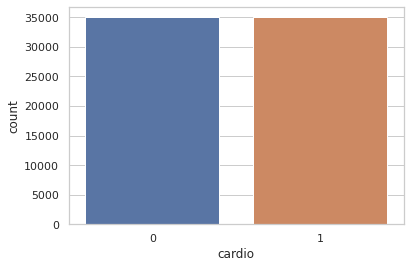

In [504]:
# check distribution of target variable
print(df.cardio.value_counts())
sns.countplot(x=df.cardio, data=df)
plt.show()

35,021 out of 70,000 cases in this dataset are labelled as having no cardiovascular disease, and 34,979 cases are labelled as having cardiovascular disease. 

This implies that the the number of cardio events to the number of no events is approximately equal.

## Correlations

In [505]:
# Which values in the columns move together?
df.corr() 

,BMI,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
BMI,1.000000,0.085512,-0.096529,0.024852,0.035345,0.146270,0.101390,-0.027215,0.014394,-0.014261,0.165632
age_year,0.085512,1.000000,-0.022811,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.096529,-0.022811,1.000000,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
ap_hi,0.024852,0.020764,0.006005,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.035345,0.017647,0.015254,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.146270,0.154424,-0.035821,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.101390,0.098703,-0.020491,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.027215,-0.047633,0.338135,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,0.014394,-0.029723,0.170966,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330
active,-0.014261,-0.009927,0.005866,-0.000033,0.004780,0.009911,-0.006770,0.025858,0.025476,1.000000,-0.035653


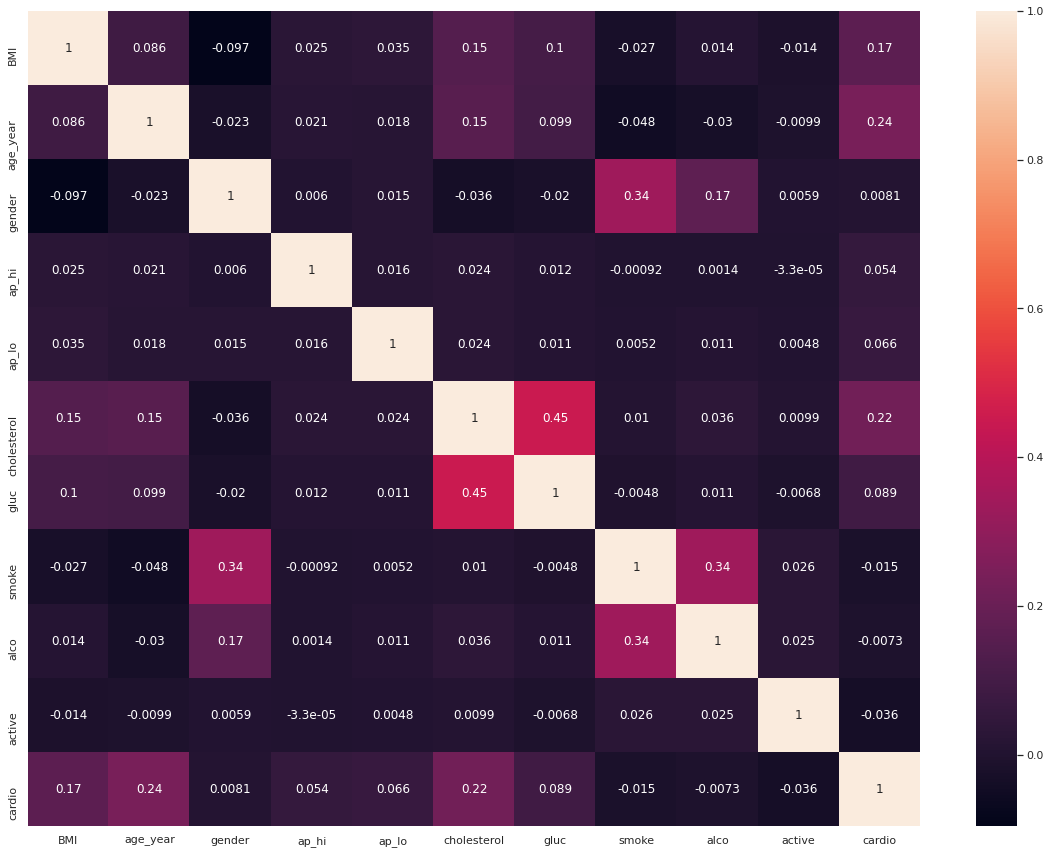

In [506]:
 # Visulazing the correlation on a heatmap.
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the final target label (cardio) and that generally, there are no significant coorelations between other variables either. However, we did note non-significant relationships between some of the variables.
- Glucose vs cholesterol are correlated with a score of 0.45. This could be due to the link between diabetes and heart diesease, as measured by high cholesterol which is found in metabolic syndrome (Cornier, et. al. 2008).
- Smoking habits vs gender are correlated with a score of 0.34. A cross-tab will provide more information below.
- Alcohol use and smoking have a correlation of 0.34 which suggests that you are more likely to smoke if you use alcohol, and vice-versa. 
- Height vs gender are correlated with a score of 0.5. This was to be expected, as generally males are taller than females. 

In [507]:
pd.crosstab(df.gender, df.smoke, normalize='index', margins=True)

smoke,0,1
gender,,
1,0.982144,0.017856
2,0.781120,0.218880
All,0.911871,0.088129


The crosstab where Female is 1, and Male is 2 shows that 20% more males smoke than females.  So, as gender increase from 1 to 2, the smoke variable will increase from 0 to 1. That explains the positive correlation.


## Exploring outliers


For the outliers, we will look at the discrete variables using a bar chart to determine if any incorrect codings have been made.  For the numeric variables, we will use boxplots to determine if any outliers exist. We do not need to look at the target variable because it has already been assessed in an earlier plot.

Any outliers might be explained by human error when entering data into the csv format. Our prediction model might benefit if these outliers were removed from the data, transformed because of skewness, or limited to a certain floor or ceiling value.

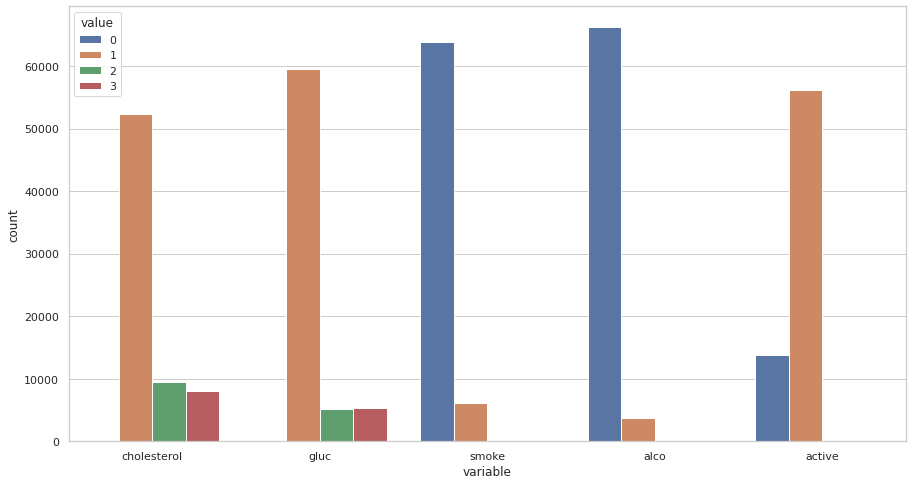

In [508]:
#Search for outliers
fig, ax = plt.subplots(figsize=(15,8))
df_c = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_c), ax=ax); 

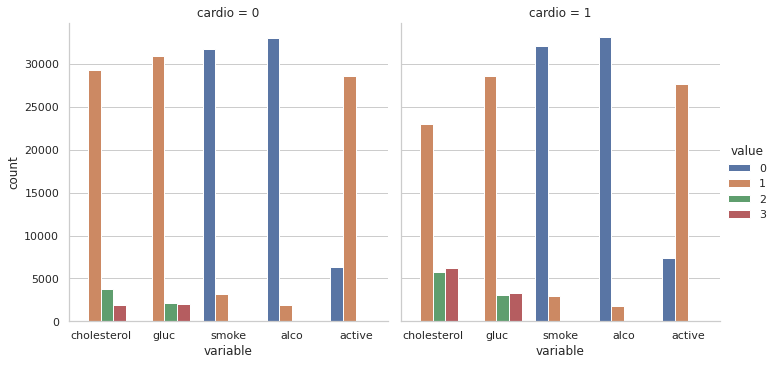

In [509]:
dfmelt = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio", data=dfmelt, kind="count");

The 6 discrete independent variables have no unexplained values, and therefore no outliers.

We will now check each continous variable for outliers and deal with them as necessary

# Age

Text(0.5, 1.0, 'Age')

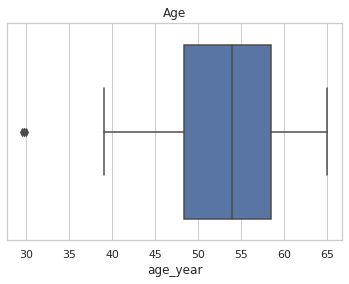

In [510]:
fig.suptitle('Check Outliers')
sns.set_style('whitegrid')
sns.boxplot(data=df, x=df.age_year).set_title("Age")

In [511]:
print(df.age_year.min())
print(df.age_year.max())
print(df['age_year'].skew())

29.5835616438356
64.9671232876712
-0.3070553957245473


We saw from the above stastical information described, the minimum and maximum ages of patients, so we will visualize the histogram to learn the distribution. Because the skew value is negative and quite small, we would expect the data to be slightly skewed to the left.

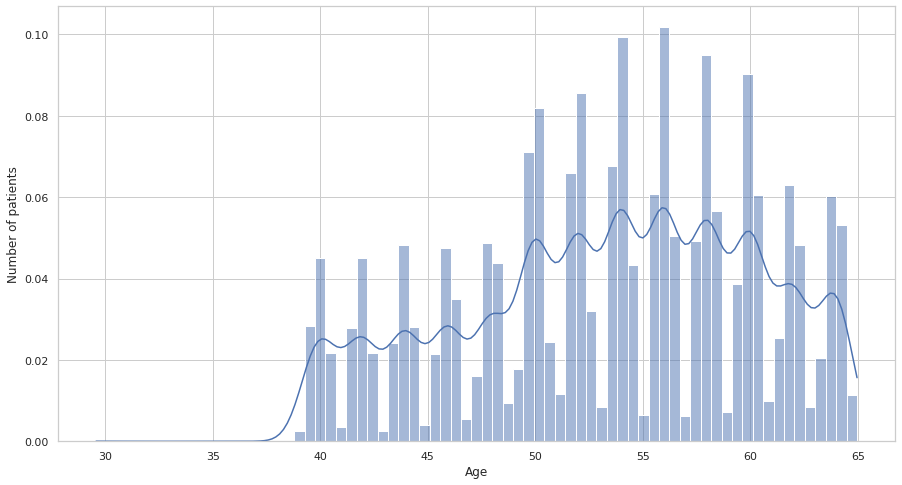

In [512]:
plt.figure(figsize=(15,8))
sns.histplot(data=df.age_year, kde=True, stat="density") 

plt.xlabel("Age")
plt.ylabel("Number of patients")

plt.show()

We can see that most of our patients are in their mid-50s and that the left tail is skewed.  However, since the value of the skew, -0.31, it is between the genberally accepted range of -0.5 and 0.5, and therefore does not need to be adjusted.

#AP_HI, Systolic

In [513]:
df.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

Text(0.5, 1.0, 'Systolic')

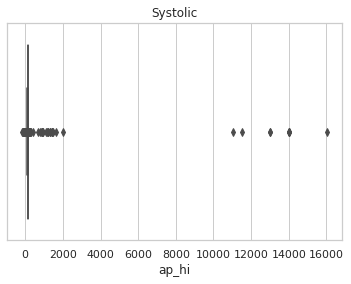

In [514]:
sns.boxplot(data=df, x=df.ap_hi).set_title("Systolic")

In [515]:
print(df.ap_hi.min())
print(df.ap_hi.max())
print(df['ap_hi'].skew())

-150
16020
85.29621385553034


In [516]:
df = df[df.ap_hi > 0]

In [517]:
#tried to remove skewness but didn't decrease it appropriately
print(df.ap_hi.min())
print(df.ap_hi.max())
print(df['ap_hi'].skew())

1
16020
85.32565808043562


Since the skewness has not been reduced substantially (from 85.29 to -2.34), we will now assign the outlier data which is unrealistic to more realistic numbers.  For Systolic, the lowest blood pressure should be 90, and the highest no more than 370.


In [518]:
#ap_hi_log = np.log(df['ap_hi'])
#ap_hi_log.skew()

Since the skewness has not been reduced substantially (from 85.29 to -2.34), we will now assign the outlier data which is unrealistic to more realistic numbers.  For Systolic, the lowest blood pressure should be 90, and the highest no more than 370.


In [519]:
df = df[df.ap_hi <= 370]
df = df[df.ap_hi >= 90]

In [520]:
df.ap_hi.describe()

count    69640.000000
mean       127.096353
std         16.995780
min         90.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        309.000000
Name: ap_hi, dtype: float64

Text(0.5, 1.0, 'Systolic')

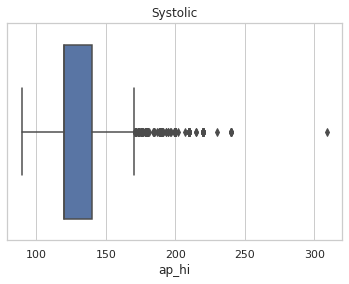

In [521]:
sns.boxplot(data=df, x=df.ap_hi).set_title("Systolic")

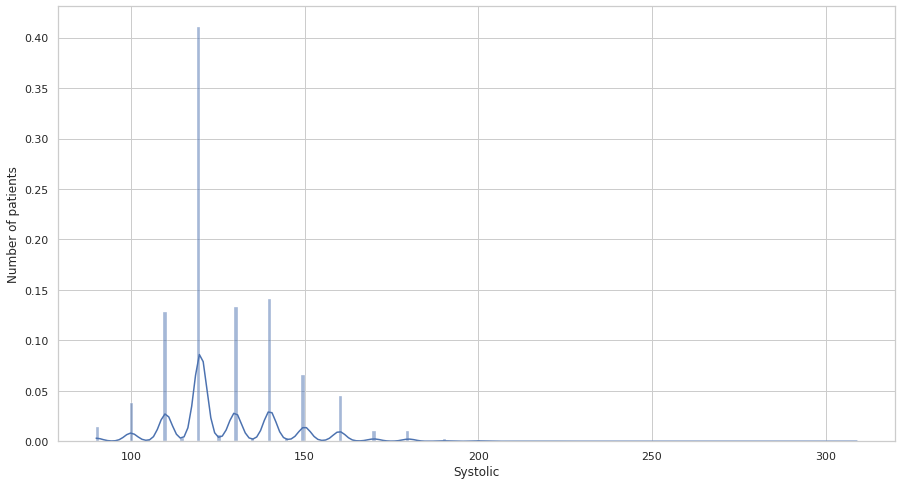

In [522]:
plt.figure(figsize=(15,8))
sns.histplot(data=df.ap_hi, kde=True, stat="density") 

plt.xlabel("Systolic")
plt.ylabel("Number of patients")

plt.show()

Now this variable looks a little more normal, and represents more realistic values.

# AP_LO, Diastolic

In [523]:
df.ap_lo.describe()

count    69640.000000
mean        96.648578
std        188.709945
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

Text(0.5, 1.0, 'Diastolic')

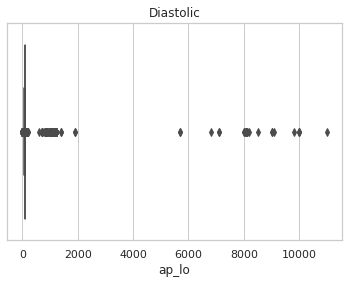

In [524]:
sns.boxplot(data=df, x=df.ap_lo).set_title("Diastolic")

In [525]:
print(df.ap_lo.min())
print(df.ap_lo.max())
print(df['ap_lo'].skew())

0
11000
32.1368058021351


Again, this variable is skewed to the right, and has variables which are not realistic.  We will set maximum and minimum values for these variables based on on a low of 70 and a high of 360 (science.abc.com).

In [526]:
df = df[df.ap_lo <= 360]
df = df[df.ap_lo >= 70]

In [527]:
df.ap_lo.describe()

count    65630.000000
mean        82.343806
std          8.619934
min         70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        190.000000
Name: ap_lo, dtype: float64

Text(0.5, 1.0, 'Diastolic')

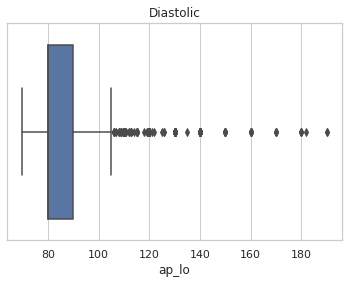

In [528]:
sns.boxplot(data=df, x=df.ap_lo).set_title("Diastolic")

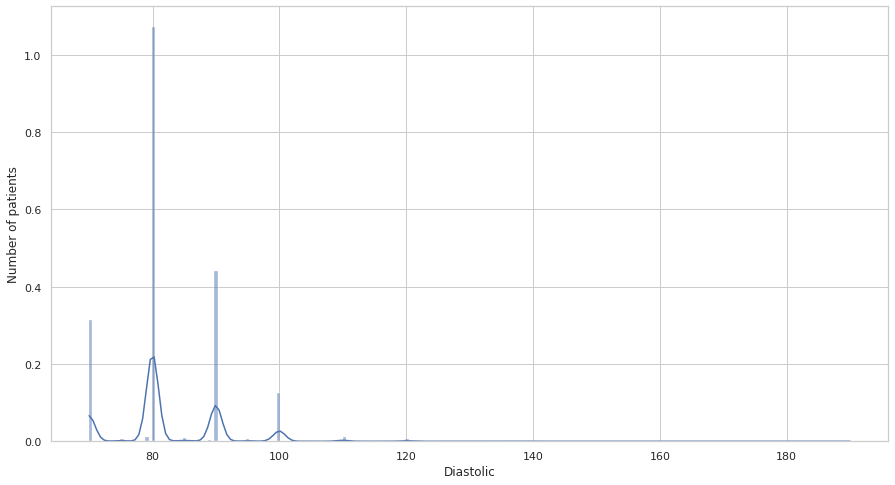

In [529]:
plt.figure(figsize=(15,8))
sns.histplot(data=df.ap_lo, kde=True, stat="density") 

plt.xlabel("Diastolic")
plt.ylabel("Number of patients")

plt.show()

Now this variable looks a little more normal, and represent more realistic values.

# BMI



In [530]:
df.BMI.describe()

count    65630.000000
mean        27.622329
std          6.045645
min          3.471784
25%         23.875115
50%         26.446281
75%         30.367347
max        298.666667
Name: BMI, dtype: float64

Text(0.5, 1.0, 'BMI')

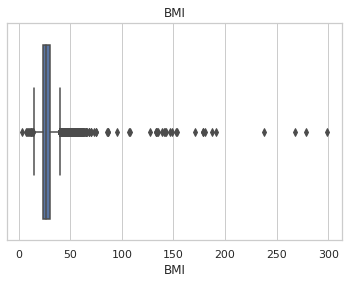

In [531]:
sns.boxplot(data=df, x=df.BMI).set_title("BMI")

In [532]:
print(df.BMI.min())
print(df.BMI.max())
print(df['BMI'].skew())

3.4717838656735265
298.6666666666667
7.849713486820935


Again, this variable is skewed to the right, and has variables which are not realistic.  We will remove the top and bottom 5th percentiles.

In [533]:
#calculating the 5th and 95th percentile values
print(df['BMI'].quantile(0.05))
print(df['BMI'].quantile(0.95))

21.09375
37.42139577948382


In [534]:
#replacing the bottom 5th and top 5th percentile values with the floor (21.09) and the ceiling (37.42)
df = df[df.BMI < 37.42]
df = df[df.BMI > 21.09]
print(df['BMI'].skew())

0.629728460805445


In [535]:
df.BMI.describe()

count    59068.000000
mean        27.221001
std          3.860320
min         21.093750
25%         24.111507
50%         26.446281
75%         29.757585
max         37.393162
Name: BMI, dtype: float64

Text(0.5, 1.0, 'BMI')

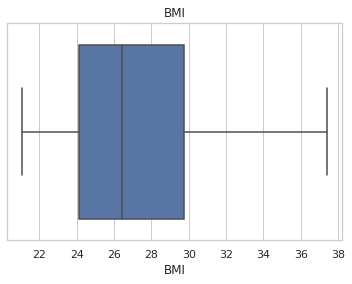

In [536]:
sns.boxplot(data=df, x=df.BMI).set_title("BMI")

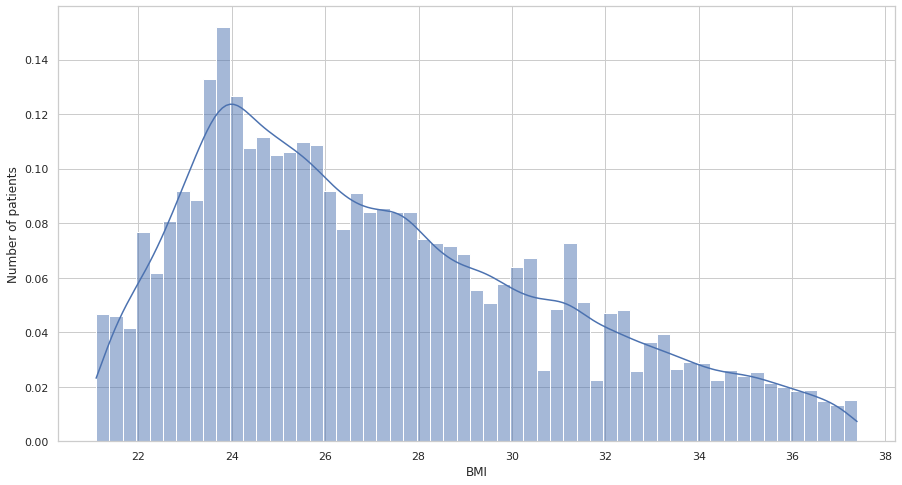

In [537]:
plt.figure(figsize=(15,8))
sns.histplot(data=df.BMI, kde=True, stat="density") 

plt.xlabel("BMI")
plt.ylabel("Number of patients")

plt.show()

Now this variable looks a little more normal, an substantially less skewed (7.89 to 0.63) and representmore realistic values.

Following are scatterplots showing the distributions of the cleaned data

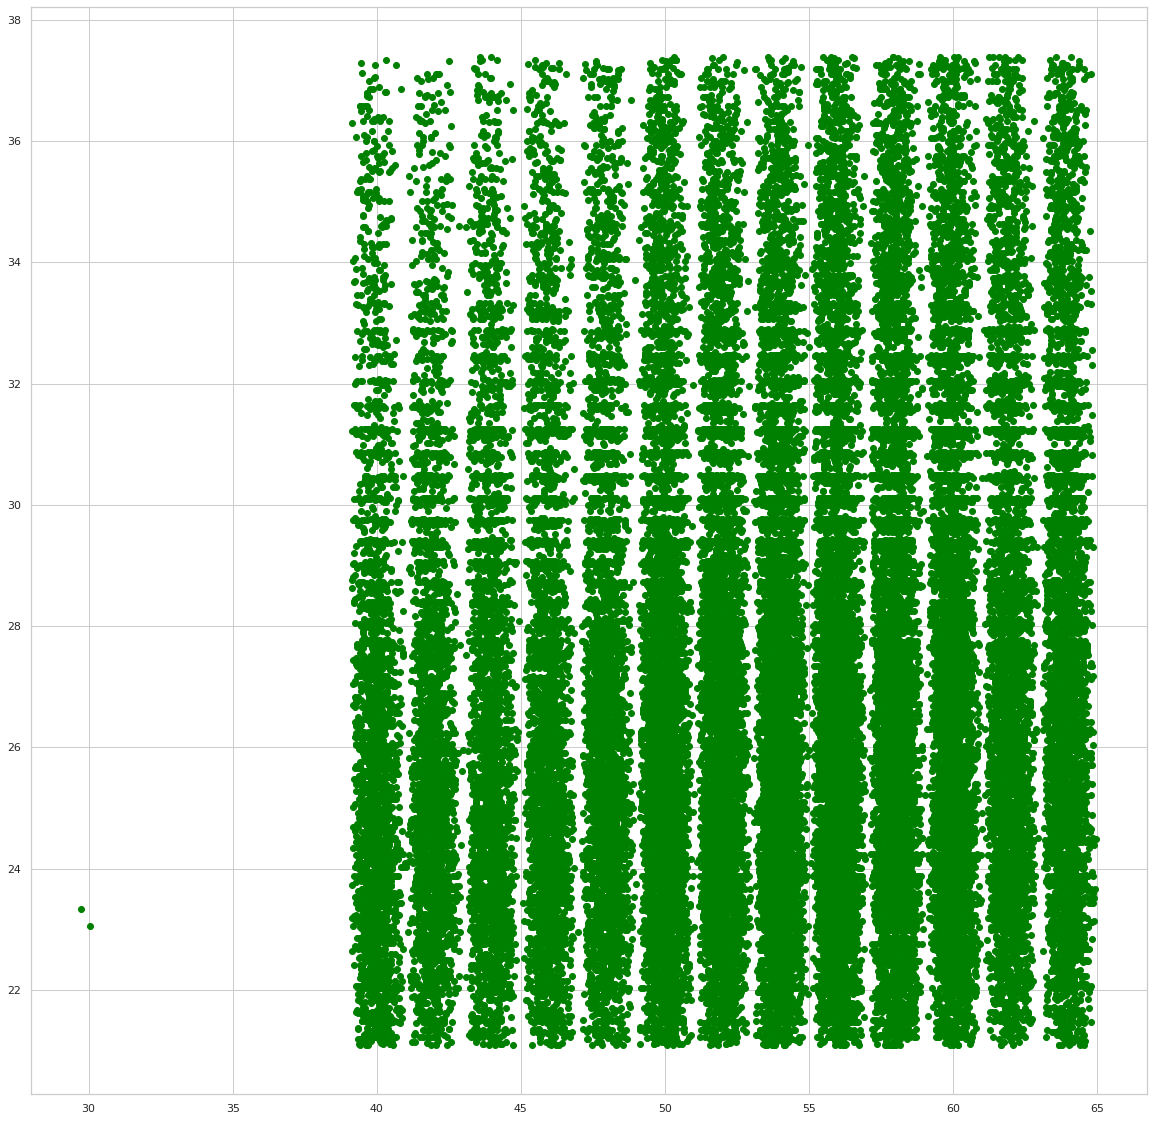

In [538]:
plt.figure(figsize=(20,20))
plt.scatter('age_year', 'BMI', data=df, marker='o', color='green')

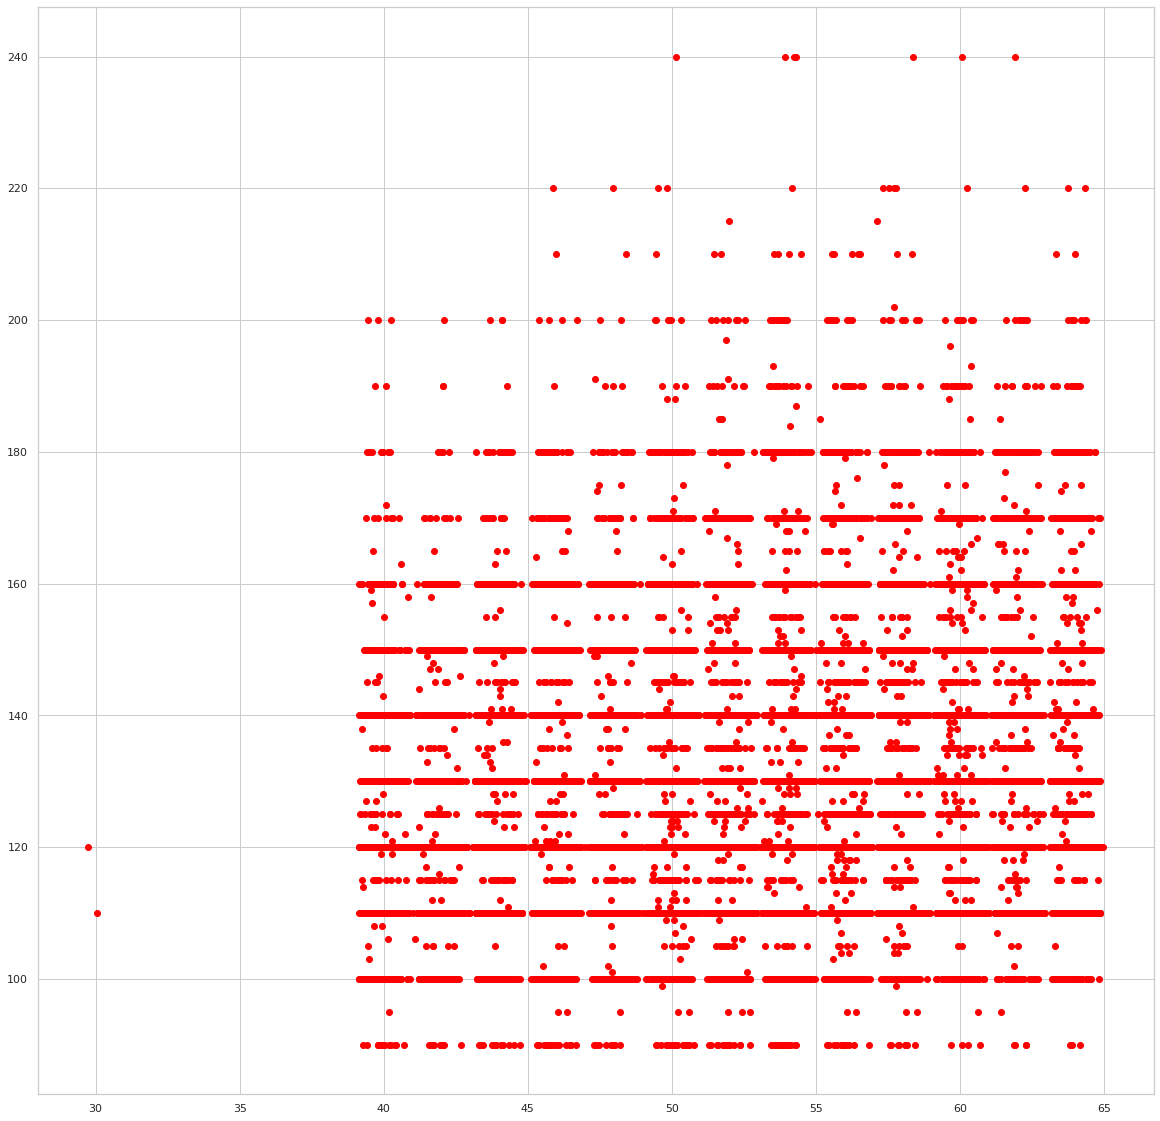

In [539]:
plt.figure(figsize=(20,20))
plt.scatter('age_year', 'ap_hi', data=df, marker='o', color='red')

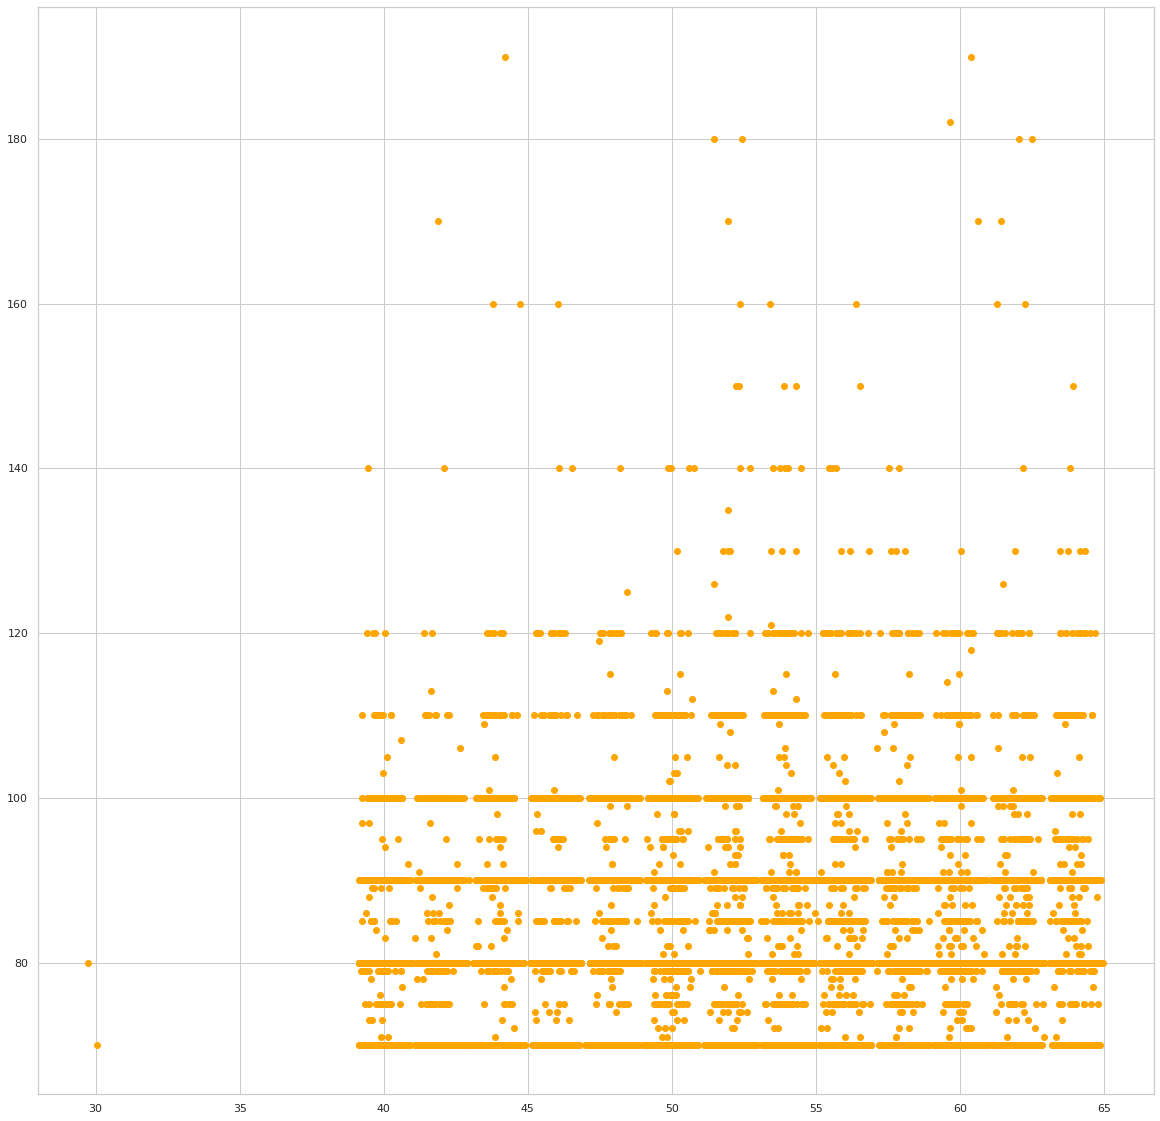

In [540]:
plt.figure(figsize=(20,20))
plt.scatter('age_year', 'ap_lo', data=df, marker='o', color='orange')

Final dataset for machine learning after preprocessing

In [541]:
#final dataset for modeling
df.shape

(59068, 11)

In [542]:

#cont_cols = ['age_year', 'BMI', 'ap_hi', 'ap_lo']
#ord_cols = ['cholesterol', 'gluc'] # more than two catagory
#bin_cols = ['gender', 'smoke', 'alco', 'active', 'cardio'] # two catagory variable

# Convert cholesterol to categorical
df["cholesterol"] = df["cholesterol"].astype("category")

# Convert gluc to categorical
df["gluc"] = df["gluc"].astype("category")

# Convert gender to categorical
df["gender"] = df["gender"].astype("category")

df.head()

,BMI,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,21.967120,50.391781,2,110,80,1,1,0,0,1,0
1,34.927679,55.419178,1,140,90,3,1,0,0,1,1
2,23.507805,51.663014,1,130,70,3,1,0,0,0,1
3,28.710479,48.282192,2,150,100,1,1,0,0,1,1
5,29.384676,60.038356,1,120,80,2,2,0,0,0,0


In [543]:
# new gender labels
df["gender"].unique()

# new gender labels
df["gender"]=df["gender"].cat.rename_categories(['female', 'male'])

In [544]:
# check number of levels in Cholesterol
df["cholesterol"].unique()


[1, 3, 2]
Categories (3, int64): [1, 3, 2]

In [545]:
# new cholesterol labels
df["cholesterol"]= df["cholesterol"].cat.rename_categories(['low', 'avg', 'high'])

In [546]:
df["gluc"].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [547]:
df["gluc"]= df["gluc"].cat.rename_categories(['low', 'avg', 'high'])

In [548]:
# create dummy variables for gender
gender_list = pd.get_dummies(df["gender"])
new_gender_data=df.join(gender_list)
df=new_gender_data

# remove column gender since we have dummies for it
df = df.drop(['gender'], axis = 1)

In [549]:
df.head()

,BMI,age_year,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,female,male
0,21.967120,50.391781,110,80,low,low,0,0,1,0,0,1
1,34.927679,55.419178,140,90,high,low,0,0,1,1,1,0
2,23.507805,51.663014,130,70,high,low,0,0,0,1,1,0
3,28.710479,48.282192,150,100,low,low,0,0,1,1,0,1
5,29.384676,60.038356,120,80,avg,avg,0,0,0,0,1,0


In [550]:
# create dummy variables for cholesterol
cholesterol_list = pd.get_dummies(df["cholesterol"], prefix="cholesteroll")
new_cholesterol_data=df.join(cholesterol_list)
df=new_cholesterol_data

# remove column cholesterol since we have dummies for it
df = df.drop(['cholesterol'], axis = 1)



In [551]:
df.head()

,BMI,age_year,ap_hi,ap_lo,gluc,smoke,alco,active,cardio,female,male,cholesteroll_low,cholesteroll_avg,cholesteroll_high
0,21.967120,50.391781,110,80,low,0,0,1,0,0,1,1,0,0
1,34.927679,55.419178,140,90,low,0,0,1,1,1,0,0,0,1
2,23.507805,51.663014,130,70,low,0,0,0,1,1,0,0,0,1
3,28.710479,48.282192,150,100,low,0,0,1,1,0,1,1,0,0
5,29.384676,60.038356,120,80,avg,0,0,0,0,1,0,0,1,0


In [552]:

# create dummy variables for gluc
gluc_list = pd.get_dummies(df["gluc"], prefix="gluc")
new_gluc_data=df.join(gluc_list)
df=new_gluc_data

# remove column gluc since we have dummies for it

df = df.drop(['gluc'], axis = 1)

In [553]:
df.head()

,BMI,age_year,ap_hi,ap_lo,smoke,alco,active,cardio,female,male,cholesteroll_low,cholesteroll_avg,cholesteroll_high,gluc_low,gluc_avg,gluc_high
0,21.967120,50.391781,110,80,0,0,1,0,0,1,1,0,0,1,0,0
1,34.927679,55.419178,140,90,0,0,1,1,1,0,0,0,1,1,0,0
2,23.507805,51.663014,130,70,0,0,0,1,1,0,0,0,1,1,0,0
3,28.710479,48.282192,150,100,0,0,1,1,0,1,1,0,0,1,0,0
5,29.384676,60.038356,120,80,0,0,0,0,1,0,0,1,0,0,1,0


<a id="t5."></a>
# 5. Separating Training and Testing Data

In order to train our model and subsequently test it, we will separate the data into two groups. We decided to base it on a random split using the commonly-used 70/30 split where 70% of the data will be separated and be used for training, and the remaining 30% will be used to test the model.

In [554]:
#Prepare data for training.
#Split columns to independent variables & target variable.

y = df["cardio"]
X = df.drop(['cardio'], axis = 1)


In [555]:
X.head()

,BMI,age_year,ap_hi,ap_lo,smoke,alco,active,female,male,cholesteroll_low,cholesteroll_avg,cholesteroll_high,gluc_low,gluc_avg,gluc_high
0,21.967120,50.391781,110,80,0,0,1,0,1,1,0,0,1,0,0
1,34.927679,55.419178,140,90,0,0,1,1,0,0,0,1,1,0,0
2,23.507805,51.663014,130,70,0,0,0,1,0,0,0,1,1,0,0
3,28.710479,48.282192,150,100,0,0,1,0,1,1,0,0,1,0,0
5,29.384676,60.038356,120,80,0,0,0,1,0,0,1,0,0,1,0


In [556]:
y.head()

0    0
1    1
2    1
3    1
5    0
Name: cardio, dtype: int64

In [557]:
# split data. Split Rows to train & test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (41347, 15) (41347,)
Test set: (17721, 15) (17721,)


<a id="t6."></a>
# 6. Classification Modeling

We will be preparing a KNeighbors Classifier Model, a Naive Bayes Model, a Decision Tree and a Random Forest Classifier in order to find a classification model which best fits our data and predicts the appropraite outcome.

## KNeighbors Classifier -KNN

In [558]:
#Training 1st Model - KNeighborsClassifier = 63%
from sklearn.neighbors import KNeighborsClassifier
# K = 2 because of cardio (target value 0/1)
model_knn = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred = model_knn.predict(X_test)

KNeighborsClassifier


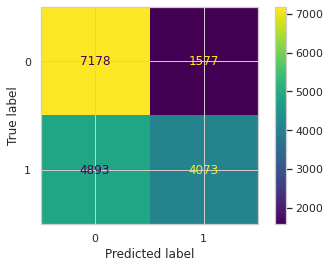

In [559]:
### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("KNeighborsClassifier")
plot_confusion_matrix(model_knn, X_test, y_test, values_format="n")
plt.show()

### Evaluating function for all models

In [560]:
# evaluate the model
def evaluate_model(model, X_test, y_test):

    # predict the response for test dataset
    y_pred = model.predict(X_test)

    print("Accuracy: {:.0f}%".format(accuracy_score(y_test, y_pred)*100))

    # precision: what percentage of positive tuples are labeled as such?
    print("Precision: {:.0f}%".format(precision_score(y_test, y_pred)*100))

    # recall: what percentage of positive tuples are labelled as such?
    print("Recall:: {:.0f}%".format(recall_score(y_test, y_pred)*100))

In [561]:
print("KNeighborsClassifier")
evaluate_model(model_knn, X_test, y_test)


KNeighborsClassifier
Accuracy: 63%
Precision: 72%
Recall:: 45%


## Naive Bayes

In [562]:
#Training 2nd Model - Naive Bayes = 67%
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)
y_pred = NBclassifier.predict(X_test)

Naive Bayes


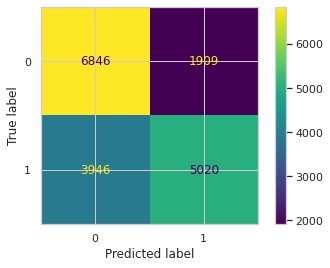

In [563]:
### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Naive Bayes")
plot_confusion_matrix(NBclassifier, X_test, y_test, values_format="n")
plt.show()

In [564]:
print("Naive Bayes")
evaluate_model(NBclassifier, X_test, y_test)



Naive Bayes
Accuracy: 67%
Precision: 72%
Recall:: 56%


## Decision Tree

In [565]:
#Training 3rd Model - DecisionTree = 72%
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

DecisionTree


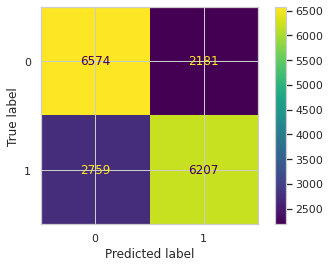

In [566]:
### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("DecisionTree")

plot_confusion_matrix(model_tree, X_test, y_test, values_format="n")
plt.show()

In [567]:
print("Decision Tree")
evaluate_model(model_tree, X_test, y_test)


Decision Tree
Accuracy: 72%
Precision: 74%
Recall:: 69%


## Random Forest Classifier

In [568]:
# Training 4th Model - RandomForestClassifier = 70%
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test).round(0)

Random Forest


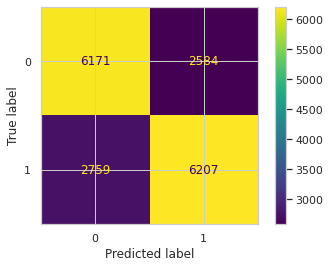

In [569]:
### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Random Forest")

plot_confusion_matrix(model_rf, X_test, y_test, values_format="n")
plt.show()


In [570]:
print("Random Forest")
evaluate_model(model_rf, X_test, y_test)

Random Forest
Accuracy: 70%
Precision: 71%
Recall:: 69%


## Logistic Regression

In [571]:
# Training 5th Model - LogisticRegression = 72%
logreg = LogisticRegression(max_iter=500, solver='liblinear')
logreg.fit(X_train, y_train)
# Prediction on test data
y_pred = logreg.predict(X_test)

LogisticRegression


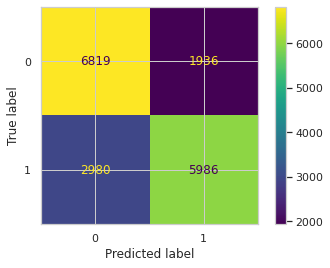

In [572]:
### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("LogisticRegression")

plot_confusion_matrix(logreg, X_test, y_test, values_format="n")
plt.show()

In [573]:
print("LogisticRegression")
evaluate_model(logreg, X_test, y_test)

LogisticRegression
Accuracy: 72%
Precision: 76%
Recall:: 67%


In [574]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Performance of Models

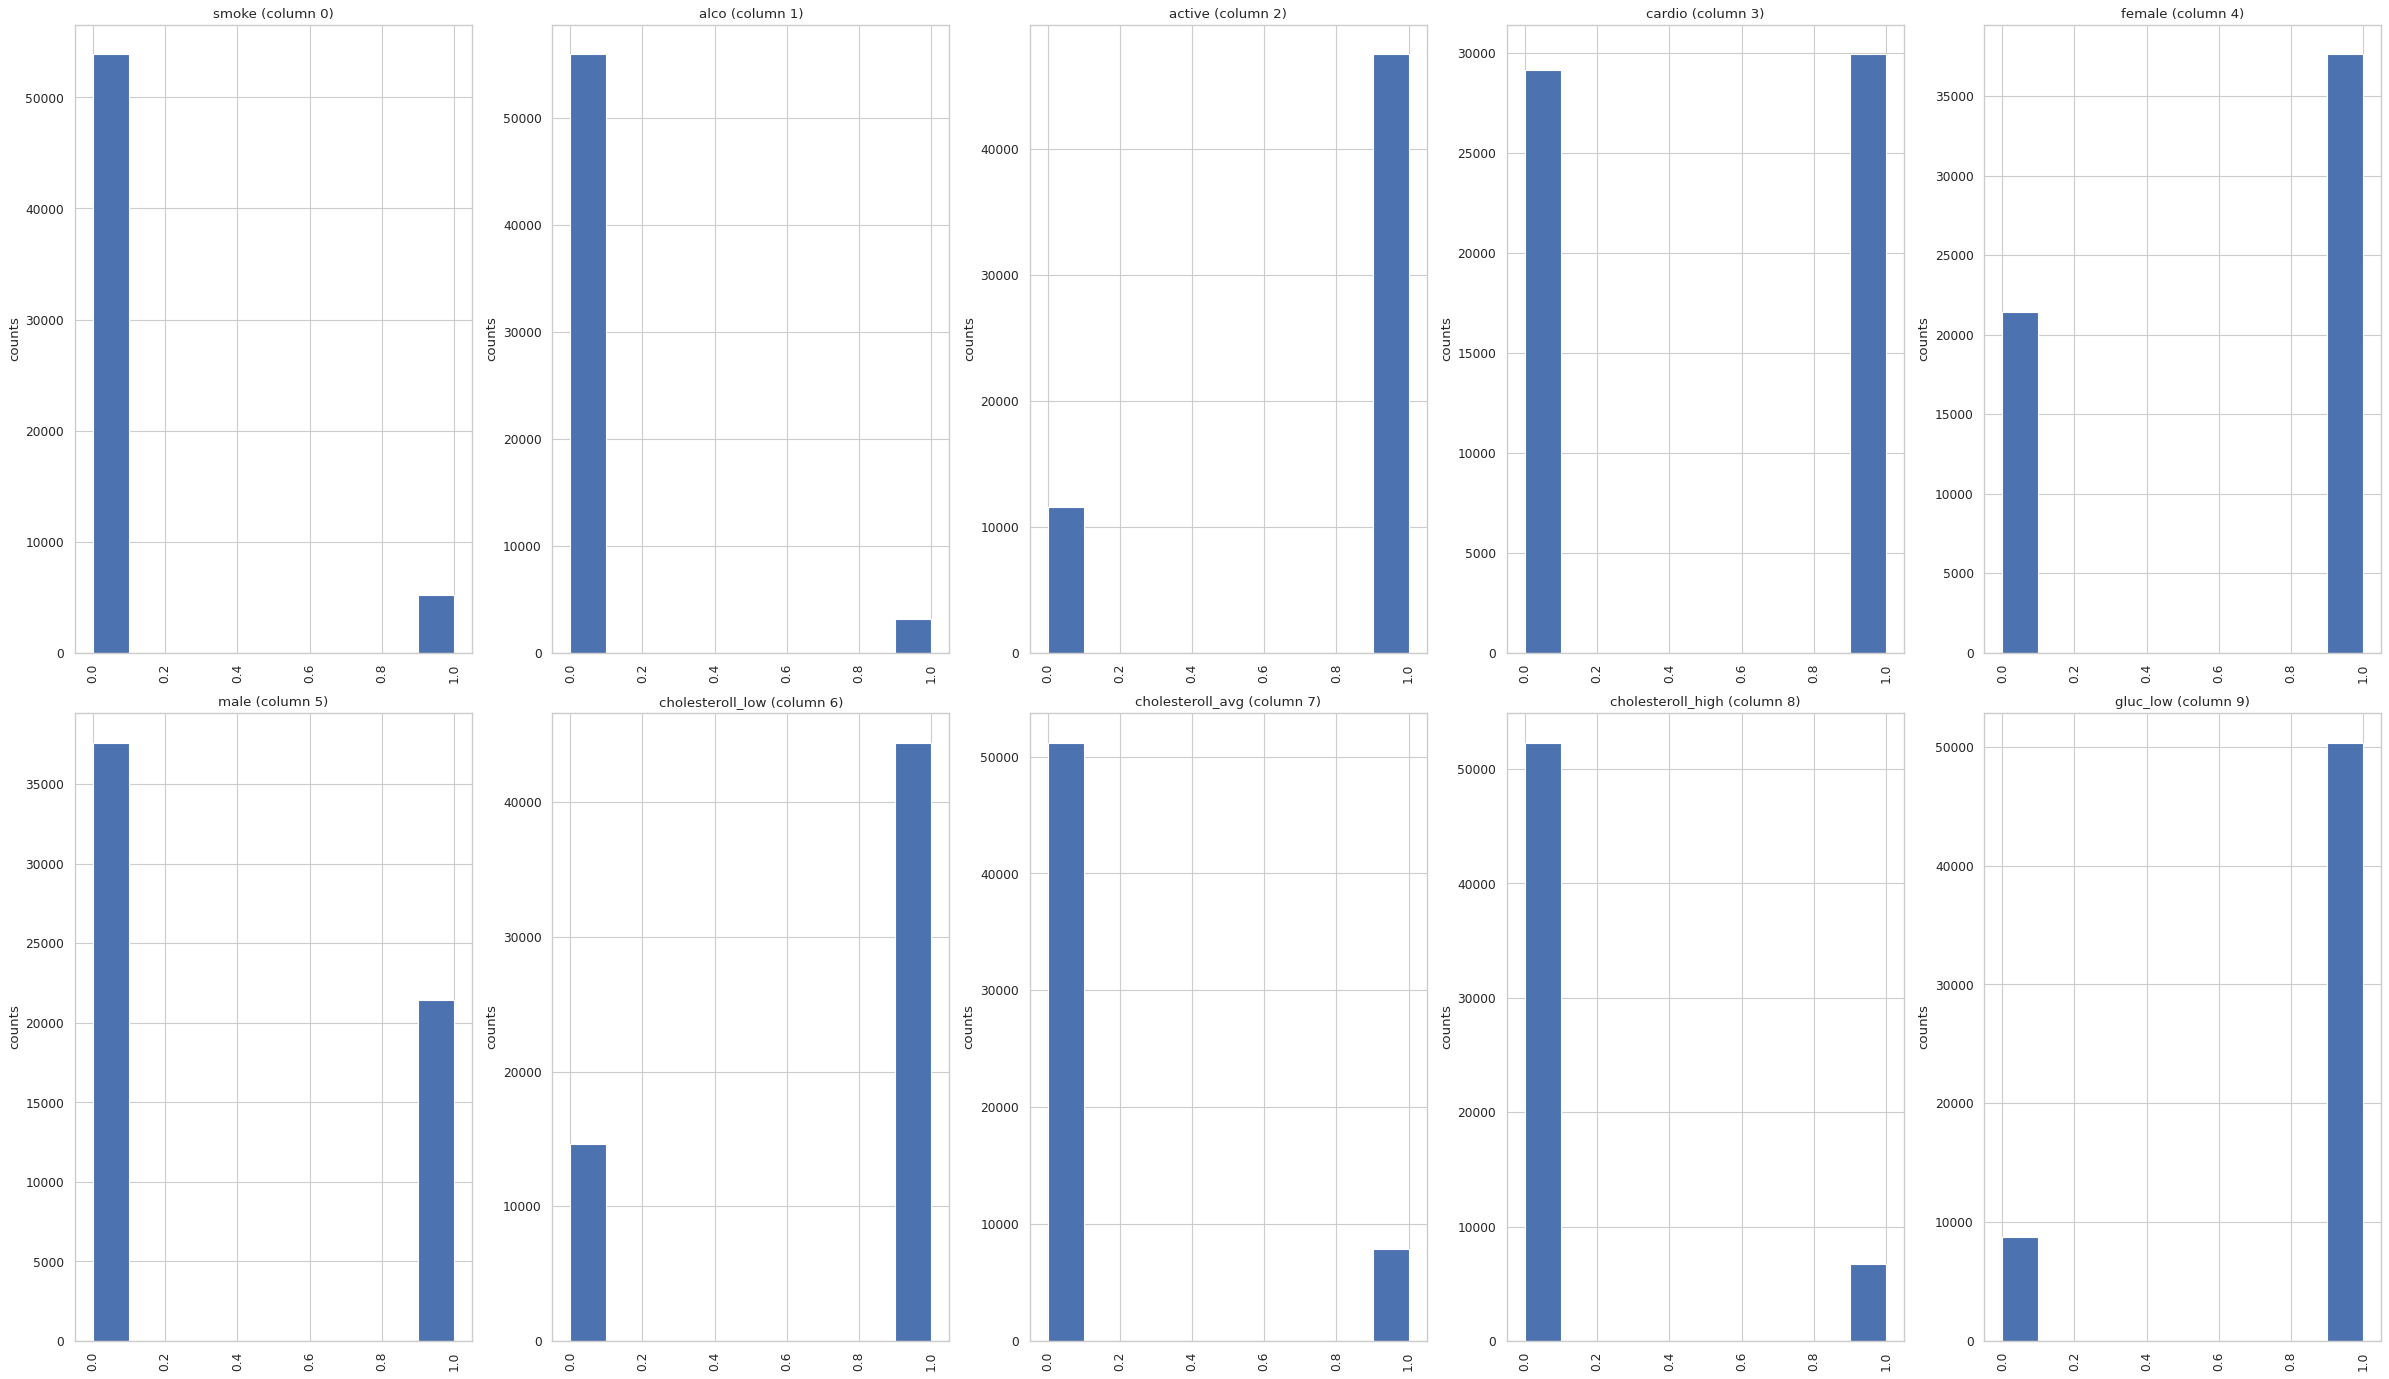

In [575]:
plotPerColumnDistribution(df, 10, 5)

<a id="t7."></a>
# 7. Deployment

The best fit model (in our case either Logistic Regression Classifier or Decision Tree Classifier both **72%** accuracy) will be a useful and reliable prediction of the likelihood of a patient having a cardiac event given their attributes of BMI, age, gender, blood pressure, cholesterol reading, glucose reading, whether or not they're a smoker, drink alcohol and have an active lifestyle.



<a id="t8."></a>
# 8. Sources


Marc-Andre Cornier, Dana Dabelea, Teri L. Hernandez, Rachel C. Lindstrom, Amy J. Steig, Nicole R. Stob, Rachael E. Van Pelt, Hong Wang, Robert H. Eckel, The Metabolic Syndrome, Endocrine Reviews, Volume 29, Issue 7, 1 December 2008, Pages 777–822, https://doi.org/10.1210/er.2008-0024

Torrance, G., Hooper, M. & Reeder, B. Trends in overweight and obesity among adults in Canada (1970–1992): evidence from national surveys using measured height and weight. Int J Obes 26, 797–804 (2002). https://doi.org/10.1038/sj.ijo.0801991


Reducing dietary sodium and decreases in cardiovascular disease in Canada [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2643195/#b1-cjc24497](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2643195/#b1-cjc24497)


AHA 2019 Heart Disease and Stroke Statistics [https://www.acc.org/latest-in-cardiology/ten-points-to-remember/2019/02/15/14/39/aha-2019-heart-disease-and-stroke-statistics](https://www.acc.org/latest-in-cardiology/ten-points-to-remember/2019/02/15/14/39/aha-2019-heart-disease-and-stroke-statistics)


Cardiovascular disease diagnosis [https://github.com/caravanuden/cardio](https://github.com/caravanuden/cardio)

https://www.ennonline.net/fex/15/limits

https://en.wikipedia.org/wiki/List_of_heaviest_people

https://www.scienceabc.com/eyeopeners/how-high-can-a-blood-pressure-go.html

